In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
dataset_train = pd.read_csv('tatapower_train.csv')
training_set = dataset_train.iloc[:,[1,2,3,4]].values

In [63]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Volume,Value
0,10-May-2022,229.95,234.5,220.65,221.40,222.15,30274946,"6,891,364,247.35"
1,09-May-2022,235.00,236.5,223.05,229.95,230.00,60959066,"13,971,123,200.15"
2,06-May-2022,243.00,247.0,240.65,246.95,245.20,28044381,"6,830,458,434.65"
3,05-May-2022,248.95,251.3,244.95,247.30,247.50,24304759,"6,036,269,744.90"
4,04-May-2022,249.85,254.2,242.85,246.00,244.95,30780217,"7,675,753,086.30"


In [64]:
X_train = training_set
y_train = dataset_train.iloc[:,5].values

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [66]:
X_train

array([[ 1.37256407,  1.37546037,  1.31297202,  1.2625807 ],
       [ 1.4406346 ,  1.40192701,  1.3460677 ,  1.37818485],
       [ 1.5484691 ,  1.54087687,  1.58876933,  1.60804106],
       ...,
       [-1.32262444, -1.31752018, -1.33192411, -1.32127356],
       [-1.35969255, -1.34928015, -1.35743536, -1.34493523],
       [-1.33610375, -1.34398682, -1.35536688, -1.36251247]])

In [67]:
#importing for rnn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [68]:
#initiating the RNN
regressor = Sequential()

#Adding the first LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [69]:
#Adding a second layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [70]:
#Adding a third layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [71]:
#Adding the final layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [72]:
#adding the output layer
regressor.add(Dense(units = 1))

#compiling the rnn
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#fitting the rnn to the output layer
regressor.fit(X_train, y_train, epochs = 500, batch_size = 32)

Epoch 1/500
16/16 [==============================] - 9s 14ms/step - loss: 21808.8438
Epoch 2/500
16/16 [==============================] - 0s 18ms/step - loss: 21483.5117
Epoch 3/500
16/16 [==============================] - 0s 17ms/step - loss: 20147.6660
Epoch 4/500
16/16 [==============================] - 0s 16ms/step - loss: 19145.9961
Epoch 5/500
16/16 [==============================] - 0s 15ms/step - loss: 18784.3223
Epoch 6/500
16/16 [==============================] - 0s 17ms/step - loss: 18531.8301
Epoch 7/500
16/16 [==============================] - 0s 16ms/step - loss: 18278.4219
Epoch 8/500
16/16 [==============================] - 0s 16ms/step - loss: 18077.3691
Epoch 9/500
16/16 [==============================] - 0s 16ms/step - loss: 17848.2656
Epoch 10/500
16/16 [==============================] - 0s 17ms/step - loss: 17674.2285
Epoch 11/500
16/16 [==============================] - 0s 16ms/step - loss: 17485.2812
Epoch 12/500
16/16 [==============================] - 0s 16ms/s

In [73]:
#testing the data for latest values and visualising it
dataset_test = pd.read_csv('tatapower_test.csv')
X_test = dataset_test.iloc[:, [1,2,3,4]].values
y_test=dataset_test.iloc[:,5].values

In [74]:
dataset_test.head()

,Date,Open,High,Low,Last,Close,Volume,Value
0,10-Aug-2022,229.50,230.40,227.15,228.6,228.50,11392194,"2,605,010,397.15"
1,08-Aug-2022,232.05,232.85,227.70,228.5,228.25,11852419,"2,726,188,701.25"
2,05-Aug-2022,228.65,233.25,227.70,231.2,232.10,33228441,"7,685,129,002.35"
3,04-Aug-2022,233.80,234.80,225.30,227.4,227.65,20979139,"4,813,415,144.55"
4,03-Aug-2022,232.00,237.30,231.05,232.2,232.50,25614730,"5,985,643,095.55"


In [75]:
X_test=sc.transform(X_test)

In [76]:
# Getting the predicted stock price
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price

array([[229.05032],
       [229.91902],
       [230.00883],
       [229.9347 ],
       [232.09245],
       [230.16139],
       [227.82562],
       [224.22078],
       [223.0602 ],
       [223.44994],
       [229.34315],
       [230.76118],
       [230.78464],
       [228.98523],
       [228.91364],
       [228.41788],
       [228.1108 ],
       [226.09811],
       [224.606  ],
       [224.57971],
       [224.50847],
       [223.61539],
       [222.33295],
       [219.5786 ],
       [217.99937],
       [219.35022],
       [215.61215],
       [209.59651],
       [210.38956],
       [212.72572],
       [212.55075],
       [214.82195],
       [211.54254],
       [206.79562],
       [206.75243],
       [205.4423 ],
       [207.67749],
       [216.11658],
       [221.12624],
       [223.72571],
       [223.09164],
       [225.15938],
       [230.17752],
       [231.60732],
       [232.27498],
       [231.57767],
       [230.3331 ],
       [232.05351],
       [231.9683 ],
       [231.975  ],


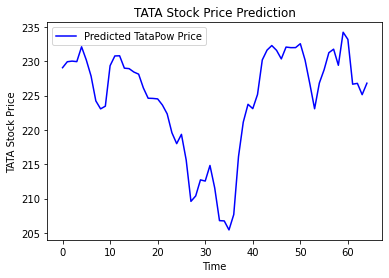

In [77]:
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TataPow Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

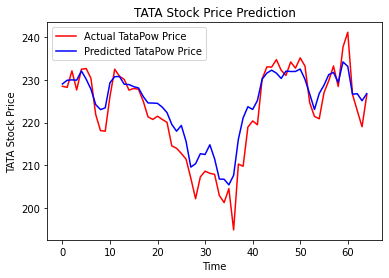

In [79]:
#Visualising the results
plt.plot(y_test, color = 'red', label = 'Actual TataPow Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TataPow Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()